# **STUDENTS EXAM SCORES-EXTENDED DATASET**
**Exam scores for students at apublic school**


# About Dataset
**This Dataset includes scores from three test scores of students at a(fictional) public school and avariety of personal and socio-economic factors that may have interaction effects upon them**

# Data Dictionary(Column Description)
*  1.**Gender**:Gender of the students(male/female)
*  2.**EthnicGroup**:Ethnic group of student(group Ato E)
*  3.**ParentEduc**:Parents education background(from some_high scool to masters degree)
*  4.**Lunch Type**:School lunch type(standard,free/reduced)
*  5.**TestPrep**:Test preparation course followed(none/completed)
*  6.**ParentMaritalStatus**:Parent(s) marital status(married/single/widowed/divorsed)
*  7.**PractseSport**:How often students practise sports(never/sometimes/regularly) 
*  8.**IsFirstChild**:If the child first child in the family or not(yes/no)
*  9.**NrSiblings**:Number of siblings student has(0-7)
*  10.**TransportMeans**:Means of transport to school(schoolbus/private)
*  11.**WklyStudyHours**:Weekly self-study hours(less tha 5hrs,between 5 and 10hrs,more than  10hrs) 
*  12. **MathScore**:Math test score(0-100)
*  13.**ReadingScore**:Reading test score(0-100)
*  14.**WritingScore**:Writing test score(0-100)


# Intoduction
**In this Notebook,we will perform exploratory data analysis(EDA) and Data Visualisation of students test scores dataset.The dataset contains students demographic backgrounds and test scores**
# Objective
* To explore relationship between different variables in the dataset.
* To visualise data using various ploting techniques.
* To identify trends and patterns in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
df.shape

(30641, 15)

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


**Drop Unnamed column**
* From the dataset we can see that Unnamed column is as same as index.So I droped the column.

In [5]:
df1=df.drop(["Unnamed: 0"],axis=1)
df1.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [6]:
df1.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [7]:
df1.dtypes

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

**Correcting data type**
* From the data types output we can see that wrong datatype in Nrsiblings should have a datan type float instead of int and NA values in the column,so I convert it into int and fill NA with '0'.

In [8]:
df1['NrSiblings']=df1['NrSiblings'].fillna(0).astype(pd.Int64Dtype())
df1.dtypes

Gender                 object
EthnicGroup            object
ParentEduc             object
LunchType              object
TestPrep               object
ParentMaritalStatus    object
PracticeSport          object
IsFirstChild           object
NrSiblings              Int64
TransportMeans         object
WklyStudyHours         object
MathScore               int64
ReadingScore            int64
WritingScore            int64
dtype: object

In [9]:
df1.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.0,30641.000000,30641.000000,30641.000000
mean,2.035802,66.558402,69.377533,68.418622
std,1.497166,15.361616,14.758952,15.443525
min,0.0,0.000000,10.000000,4.000000
25%,1.0,56.000000,59.000000,58.000000
50%,2.0,67.000000,70.000000,69.000000
75%,3.0,78.000000,80.000000,79.000000
max,7.0,100.000000,100.000000,100.000000


* From the above description we  can see that the minimum sore of Reading Score is higher than that of others and minimum of Maths is '0' and the maximum of all scores is '100'.

# Exploratory Data Analysis(EDA)

# 1. Gender Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

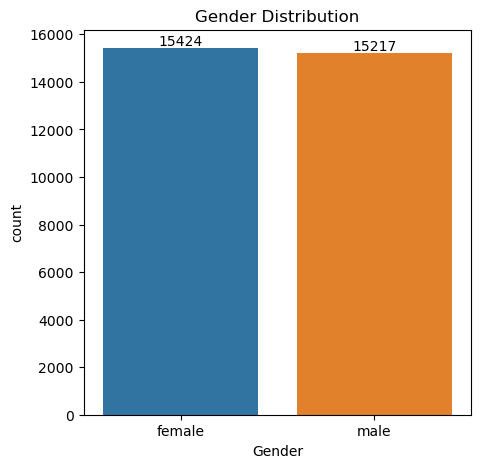

In [10]:
from matplotlib.axes import Axes
plt.figure(figsize=(5,5))
plt.title("Gender Distribution")
ax=sns.countplot(data=df1,x="Gender")
ax.bar_label(ax.containers[0])
plt.show

* From the above chart clearly we can conclude that female count is more than male.

# 2. Parent Education
* Here I try to find the impact of parent education in the test scores of students.

In [11]:
gb=df1.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


<function matplotlib.pyplot.show(close=None, block=None)>

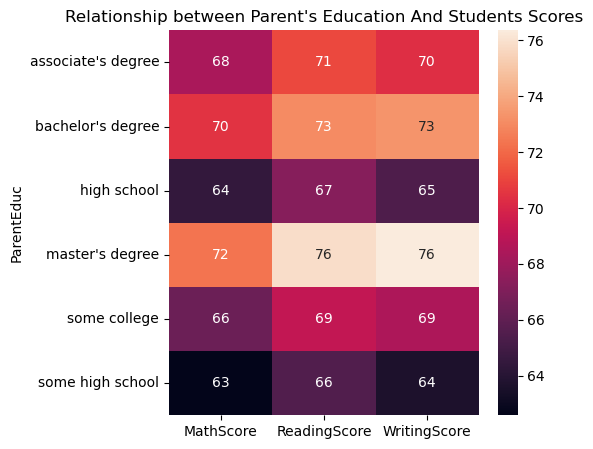

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(gb,annot=True)
plt.title("Relationship between Parent's Education And Students Scores")
plt.show

**From the above chart we have to conclude that parent's education has a good impact on the students test scores**

# 3. Parent Marital Status
* We have to check the impact of parent marital status on the students scores.

In [13]:
gb1=df1.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


<function matplotlib.pyplot.show(close=None, block=None)>

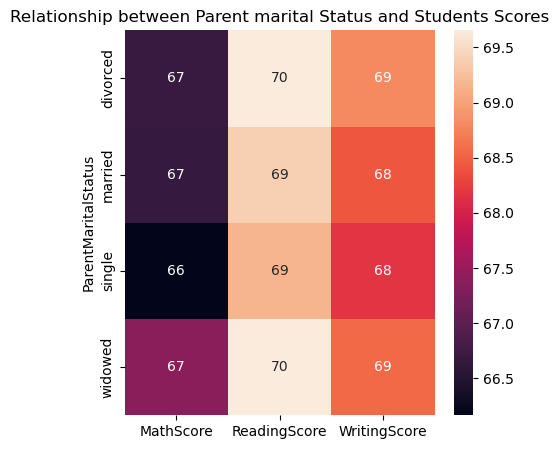

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(gb1,annot=True)
plt.title("Relationship between Parent marital Status and Students Scores")
plt.show


**From the above chart we  can see that there is no/neglgible impact on the students scores due to their parent's marital status**

# 4. Practice Sport
* Here we find the impact of practising sports.

In [15]:
gb2=df1.groupby("PracticeSport").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb2)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


<function matplotlib.pyplot.show(close=None, block=None)>

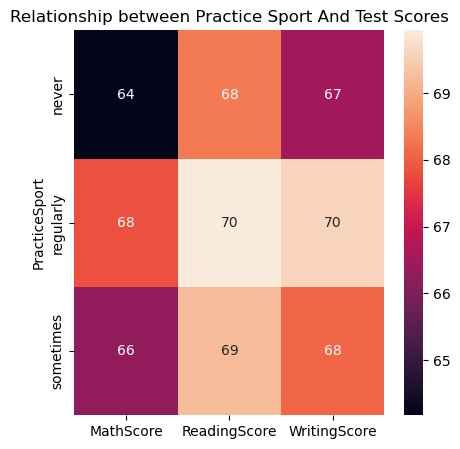

In [16]:
plt.figure(figsize=(5,5))
sns.heatmap(gb2,annot=True)
plt.title("Relationship between Practice Sport And Test Scores")
plt.show

**From the above chart we have to conclude that the score of students practice sports  regulary is relatively higher scores than other two**

# 5. Weekly Study Hours
* Here we find the impact the study hours spend and test scores

In [17]:
gb3=df1.groupby("WklyStudyHours").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb3)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


<function matplotlib.pyplot.show(close=None, block=None)>

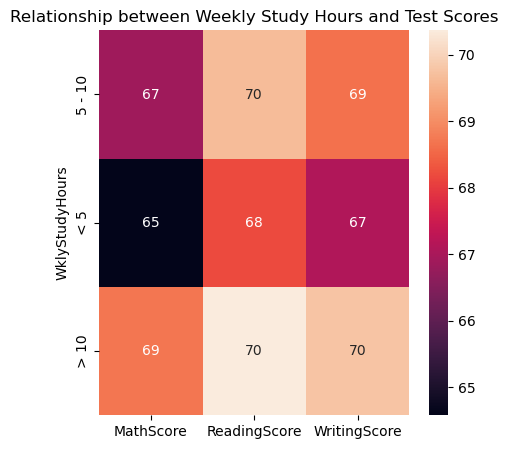

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(gb3,annot=True)
plt.title("Relationship between Weekly Study Hours and Test Scores")
plt.show

****From the above chart we have to coclude that the students spend less than 5hrs is scored lower than others.****

# 6. Number Of Siblings
* We try to find any impact on students scores due to the Nr Siblings.


In [19]:
gb4=df1.groupby("NrSiblings").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb4)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0           66.654069     69.438265     68.525231
1           66.473896     69.259097     68.245345
2           66.554934     69.472018     68.522533
3           66.719092     69.488159     68.650498
4           66.245495     69.144169     68.073444
5           66.630303     69.453788     68.282576
6           65.917219     68.801325     67.860927
7           67.615120     69.828179     68.986254


<function matplotlib.pyplot.show(close=None, block=None)>

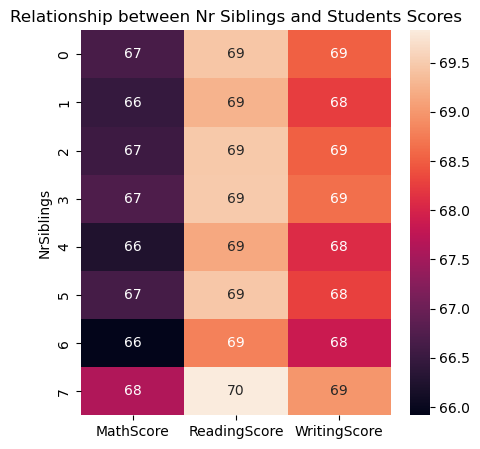

In [20]:
plt.figure(figsize=(5,5))
sns.heatmap(gb4,annot=True)
plt.title("Relationship between Nr Siblings and Students Scores")
plt.show

**From the above chart we can see that there is no/negligible impact on students scores due to number of siblings**

# 7. Test Preparation
* Here we find any impact due to test preparation on students scores.

In [21]:
print(df1["TestPrep"].unique())

['none' nan 'completed']


In [22]:
df1["TestPrep"]=df1["TestPrep"].fillna('none')
print(df1["TestPrep"].unique())

['none' 'completed']


In [23]:
gb5=df1.groupby("TestPrep").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb5)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed  69.546660     73.732998     74.703265
none       65.120323     67.281495     65.394180


<function matplotlib.pyplot.show(close=None, block=None)>

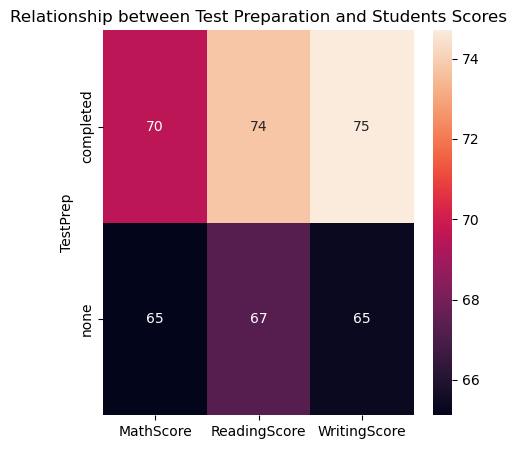

In [24]:
plt.figure(figsize=(5,5))
sns.heatmap(gb5,annot=True)
plt.title("Relationship between Test Preparation and Students Scores")
plt.show

**From the above chart we have to clearly seen that the students got high scores they completed the test preparation than the none.**

# 8. Is First Child
* Here we find any relation between students scores and the position of the student in the family.

In [25]:
gb6=df1.groupby("IsFirstChild").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb6)

              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484


<function matplotlib.pyplot.show(close=None, block=None)>

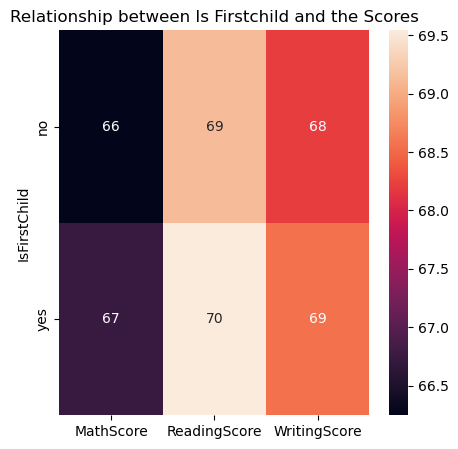

In [26]:
plt.figure(figsize=(5,5))
sns.heatmap(gb6,annot=True)
plt.title("Relationship between Is Firstchild and the Scores")
plt.show


**The above chart shown that there is no/negligble impact on the test scores based on the childs position.** 

# 8. Lunch Type
* Relation between Lunch type and test scores

In [27]:
gb7=df1.groupby("LunchType").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb7)

              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.862332     64.189735     62.650522
standard      70.709370     72.175634     71.529716


<function matplotlib.pyplot.show(close=None, block=None)>

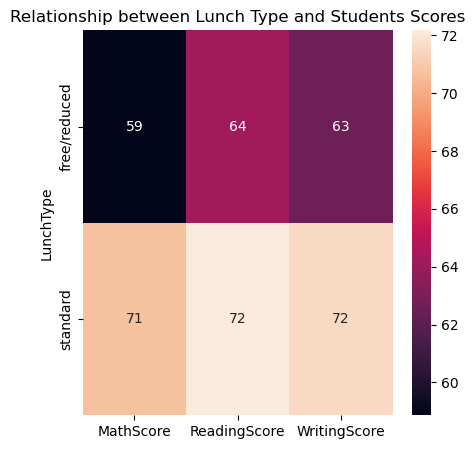

In [28]:
plt.figure(figsize=(5,5))
sns.heatmap(gb7,annot=True)
plt.title("Relationship between Lunch Type and Students Scores")
plt.show

**The above chart shown that the students of standared Lunch type scored more than free/reduced students**

# 9. Transport Means
* In this case we find the impact transport to the school

In [29]:
gb8=df1.groupby("TransportMeans").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb8)

                MathScore  ReadingScore  WritingScore
TransportMeans                                       
private         66.511354     69.472364     68.509593
school_bus      66.674636     69.446206     68.492351


<function matplotlib.pyplot.show(close=None, block=None)>

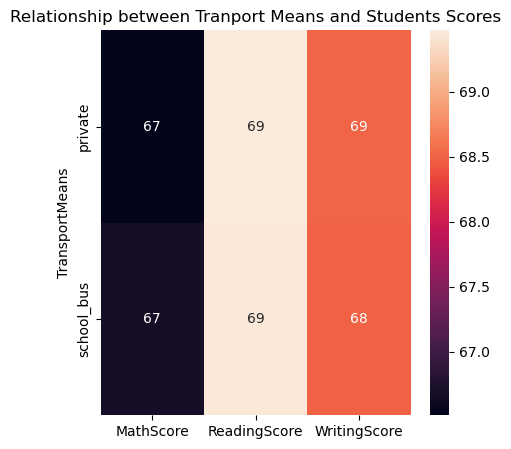

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(gb8,annot=True)
plt.title("Relationship between Tranport Means and Students Scores")
plt.show

**From the above chart we have to conclude that there is no impact due to mode of transport**

# Distribution Of EthnicGroup

In [31]:
print(df1["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


[2219, 5826, 9212, 7503, 4041]


<function matplotlib.pyplot.show(close=None, block=None)>

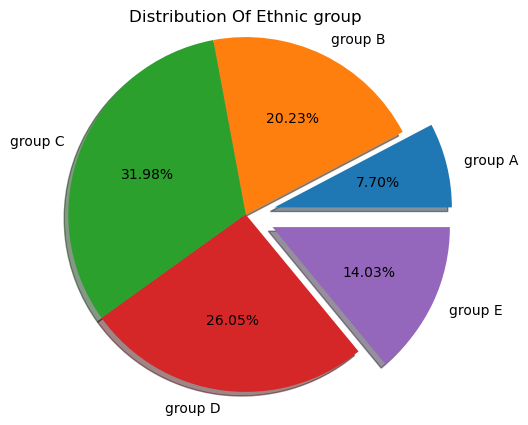

In [32]:
groupA=df1.loc[(df1["EthnicGroup"]=="group A")].count()
groupB=df1.loc[(df1["EthnicGroup"]=="group B")].count()
groupC=df1.loc[(df1["EthnicGroup"]=="group C")].count()
groupD=df1.loc[(df1["EthnicGroup"]=="group D")].count()
groupE=df1.loc[(df1["EthnicGroup"]=="group E")].count()

l=["group A","group B","group C","group D","group E"]
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
print(mlist)
plt.title("Distribution Of Ethnic group")
plt.pie(mlist,labels=l,shadow=True,autopct="%1.2f%%",radius=1.2,explode=[0.2,0,0,0,0.2])
plt.show

**From the pie chart we can see that 31.98% of students belongs to group C**

# Exam Score Analysis

/tmp/ipykernel_20/1304958061.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/1304958061.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


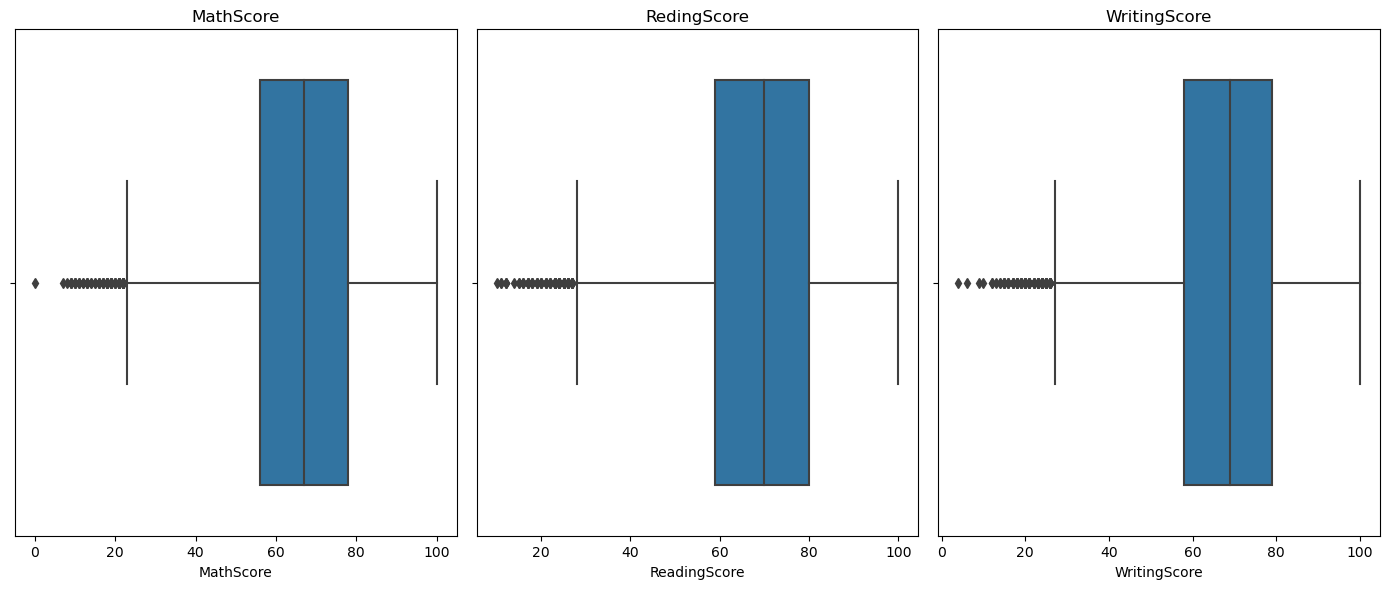

In [33]:
#This shows the statistical analysis of students performance in Maths,Reading,Writing respectively
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
sns.boxplot(data=df1,x='MathScore')
plt.title("MathScore")
plt.tight_layout()

plt.subplot(1,3,2)
sns.boxplot(data=df1,x='ReadingScore')
plt.title("RedingScore")
plt.tight_layout()

plt.subplot(1,3,3)
sns.boxplot(data=df1,x='WritingScore')
plt.title("WritingScore")
plt.tight_layout()

**The middle box represnts the middle 50% of the scores for the group**

# To check Gender performance of students that scored equal and above 80%;

In [34]:
Math_Filtered=df1.query('MathScore>=80')
Reading_Filtered=df1.query('ReadingScore>=80')
Writing_Filtered=df1.query('WritingScore>=80')

Math_Stat=Math_Filtered.groupby('Gender')['MathScore'].count()
Reading_Stat=Reading_Filtered.groupby('Gender')['ReadingScore'].count()
Writing_Stat=Writing_Filtered.groupby('Gender')['WritingScore'].count()

/tmp/ipykernel_20/391887658.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/391887658.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


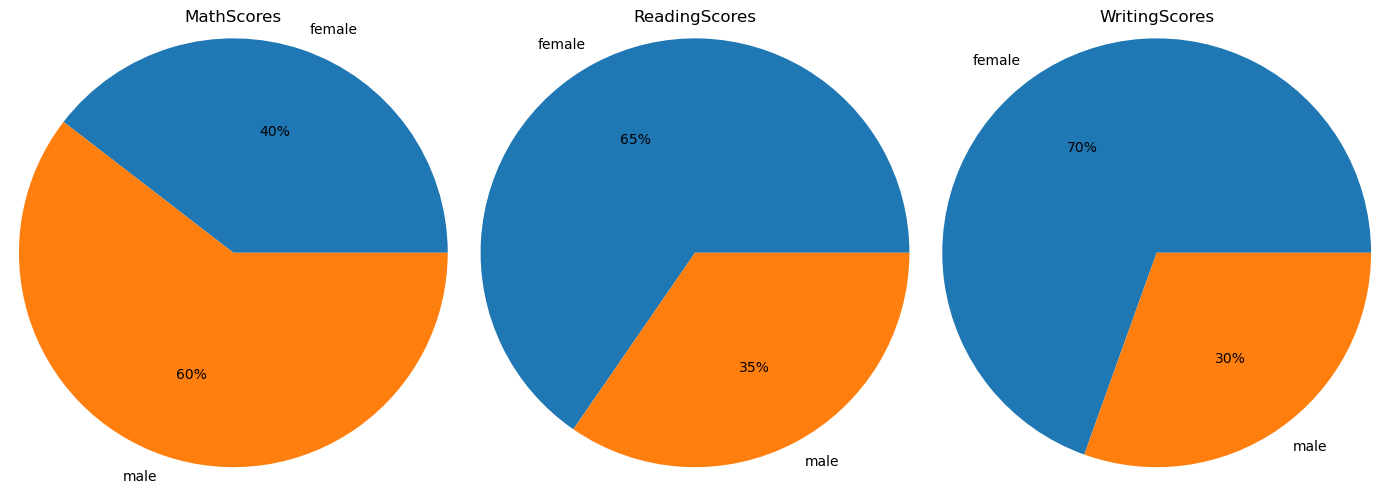

In [35]:
plt.figure(figsize=(14,6))


plt.subplot(1,3,1)
Math_Stat.plot(kind='pie',autopct="%1.0f%%",radius=1.2)
plt.title("MathScores")
plt.ylabel('')
plt.tight_layout()

plt.subplot(1,3,2)
Reading_Stat.plot(kind='pie',autopct="%1.0f%%",radius=1.2)
plt.title("ReadingScores")
plt.ylabel('')
plt.tight_layout()

plt.subplot(1,3,3)
Writing_Stat.plot(kind='pie',autopct="%1.0f%%",radius=1.2)
plt.title("WritingScores")
plt.ylabel('')
plt.tight_layout()

**From the above analysis,we can say that the larger number of males scored more than equal to 80% in Maths compared to  the females while a larger number of females scored more than equal to 80% in Reading and Writing Compared to the males.**

# Correlation Matrix

**Lets look at the coorelation among the scores in our dataset .This information is immportant to know as there are Machine learning algorithms(for example linear and logistic regression) that do not handle highly correlated input variables well.**

/tmp/ipykernel_20/1314069948.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True,fmt='.1f',square=True,center=0,linewidths=.5,cmap="RdBu",cbar_kws={"shrink":.5});


Text(0.5, 1.0, '2D-Heat Map showing correlation of Maths,Reading and Writing Scores')

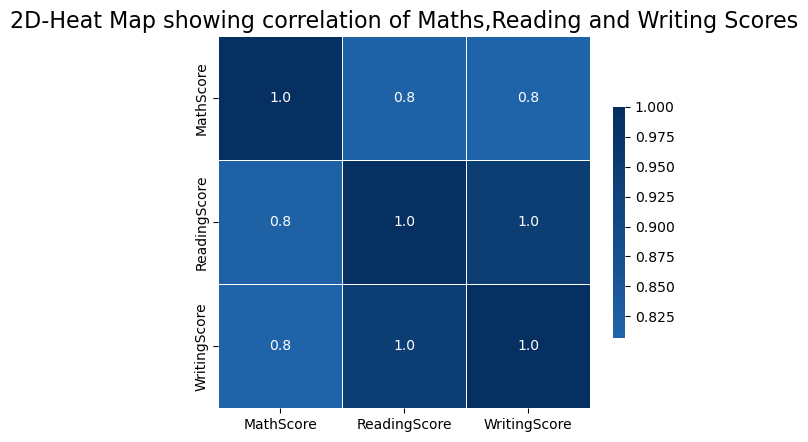

In [36]:
df2=df1.drop(['NrSiblings'],axis=1)
plt.figure(figsize=(6,6))
sns.heatmap(df2.corr(),annot=True,fmt='.1f',square=True,center=0,linewidths=.5,cmap="RdBu",cbar_kws={"shrink":.5});
plt.title("2D-Heat Map showing correlation of Maths,Reading and Writing Scores",size=16)

**From the Heatmap ,we see that Reading scores and Writing scores have a total positive linear correlation while Maths scores,Reading and Writing scores have a correlation of 0.8**

# *THANK YOU!*

****